### Cluster analysis

In [1]:
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5638447755761442
For n_clusters = 6 The average silhouette_score is : 0.4513398152234391


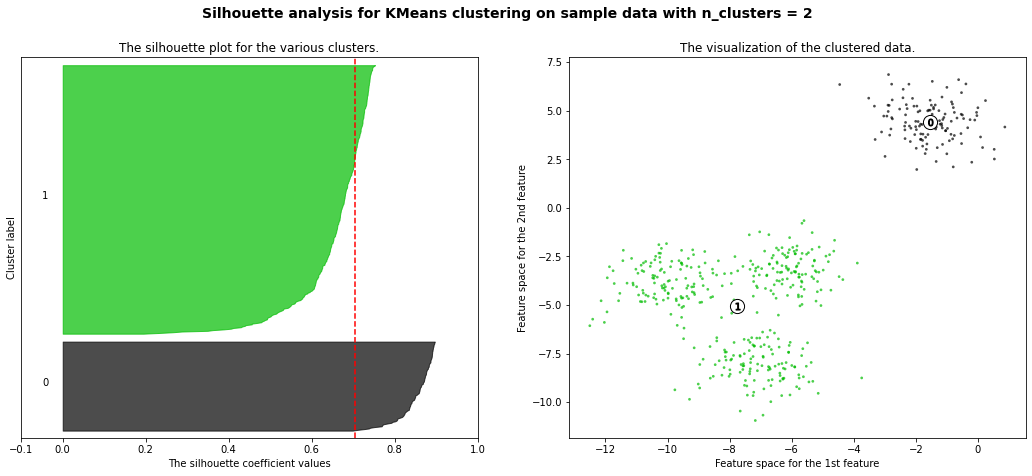

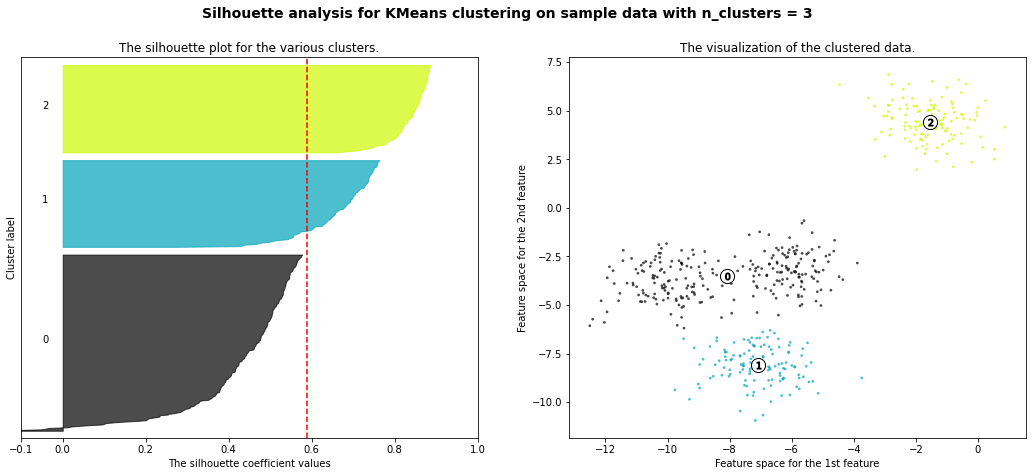

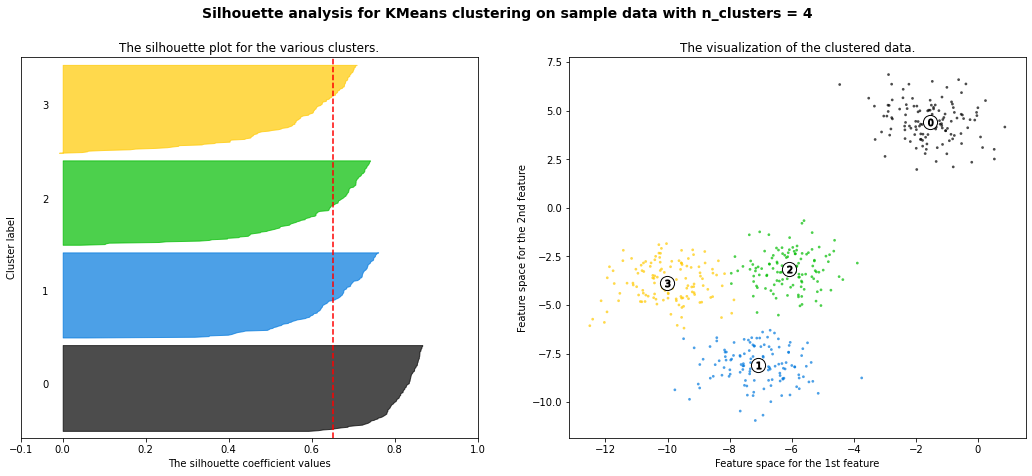

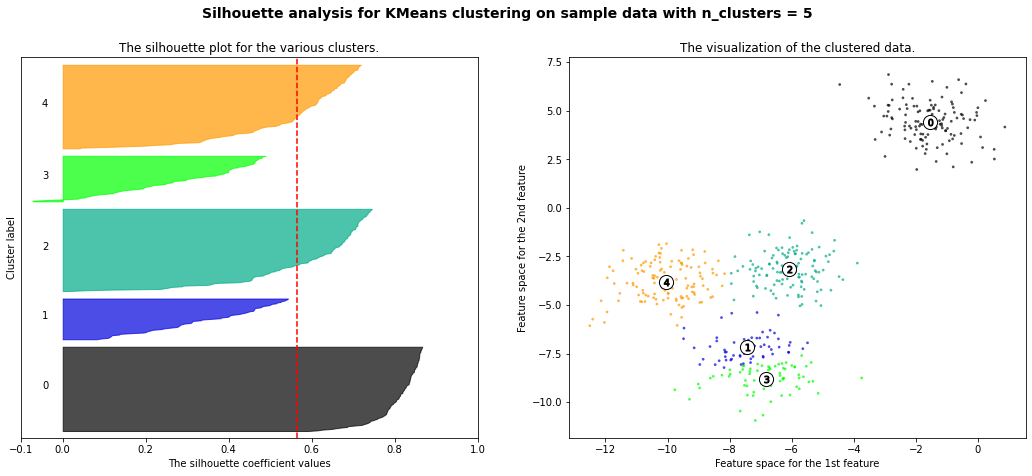

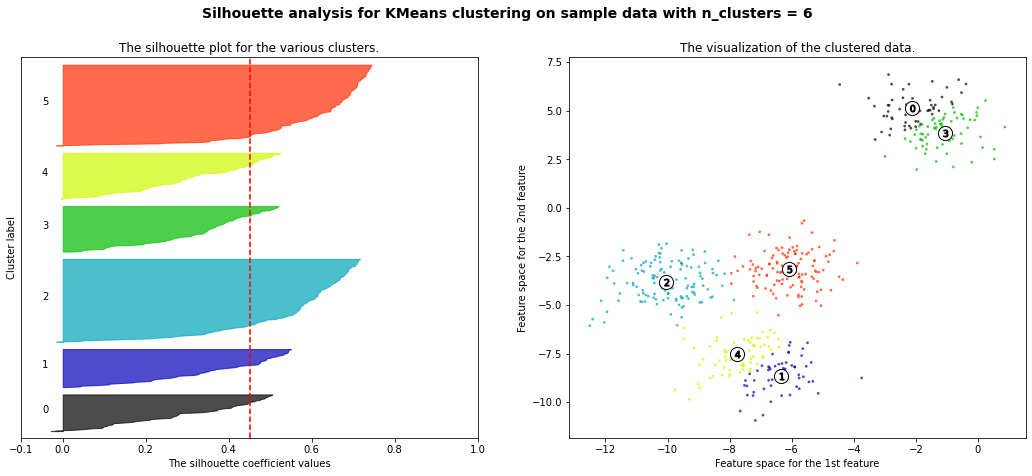

In [2]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, init='random', random_state=10)
    cluster_labels = clusterer.fit_predict(X, y)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

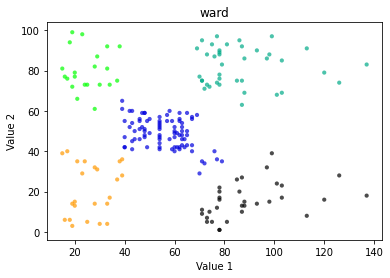

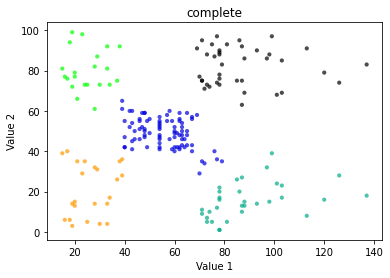

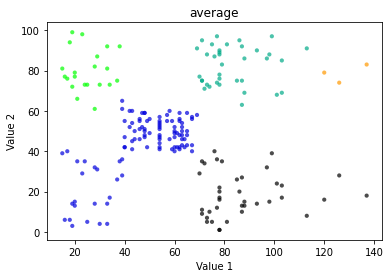

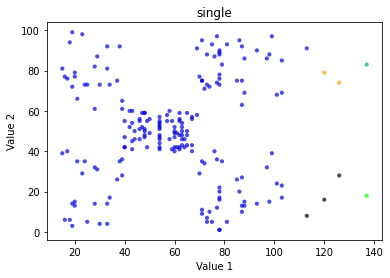

In [3]:
path = os.getcwd() + '/shopping_data.csv'
customer_data = pd.read_csv(path)

data = customer_data.iloc[:, 3:5].values

n_clusters = 5
linkage_list = ['ward', 'complete', 'average', 'single']
for li in linkage_list:
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=li)
    clustering = clustering_model.fit(data)

    plt.figure()
    colors = cm.nipy_spectral(clustering.labels_.astype(float) / n_clusters)
    plt.scatter(data[:, 0], data[:, 1], marker='.', s=70, lw=0, alpha=0.7, c=colors, edgecolor='k')

    plt.title(li)
    plt.xlabel("Value 1")
    plt.ylabel("Value 2")
    plt.show()

(0.0, 2000.0, 0.0, 425.9430430942996)

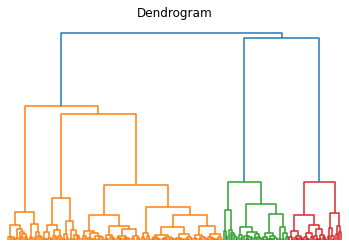

In [4]:
plt.figure()
plt.title("Dendrogram")
dendrogr = scipy.cluster.hierarchy.linkage(data, method='ward', metric='euclidean', optimal_ordering=False)
scipy.cluster.hierarchy.dendrogram(dendrogr)
plt.axis('off')

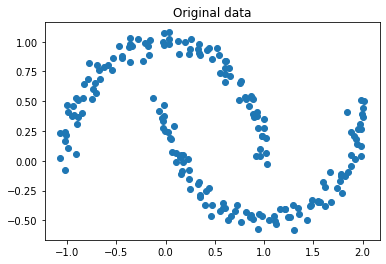

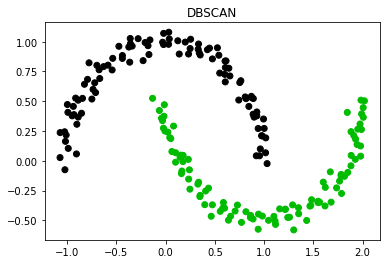

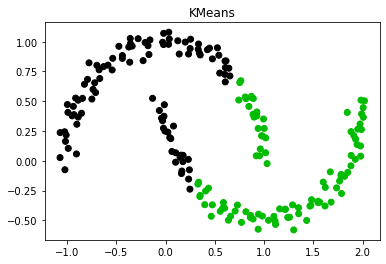

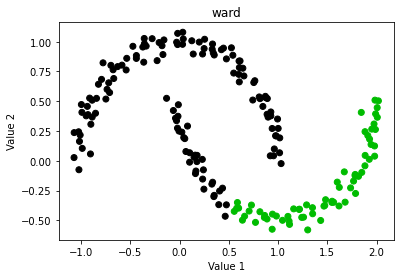

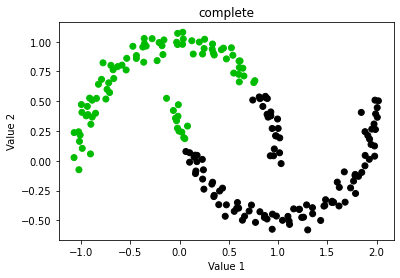

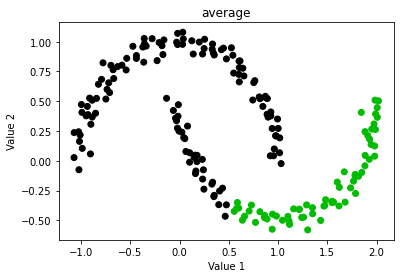

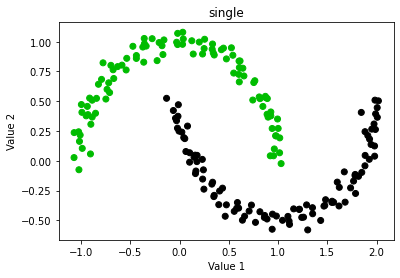

In [5]:
x, y = make_moons(n_samples=200, noise=.05, random_state=0)
plt.scatter(x[:,0],x[:,1])
plt.title("Original data")
plt.show()

plt.figure()
plt.title('DBSCAN')
dbscan = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
dbmodel_labels = dbscan.fit_predict(x)
colors = cm.nipy_spectral(dbmodel_labels.astype(float) / 2)
plt.scatter(x[:,0], x[:,1], c=colors)
plt.show()


clusterer = KMeans(n_clusters=2, init='random', random_state=10)
cluster_labels = clusterer.fit_predict(x, y)

plt.figure()
colors = cm.nipy_spectral(cluster_labels.astype(float) / 2)
plt.scatter(x[:, 0], x[:, 1], c=colors)
plt.title('KMeans')
plt.show()

linkage_list = ['ward', 'complete', 'average', 'single']
for li in linkage_list:
    clustering_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage=li)
    clustering_labels = clustering_model.fit_predict(x)

    plt.figure()
    colors = cm.nipy_spectral(clustering_labels.astype(float) / 2)
    plt.scatter(x[:, 0], x[:, 1], c=colors)

    plt.title(li)
    plt.xlabel("Value 1")
    plt.ylabel("Value 2")
    plt.show()

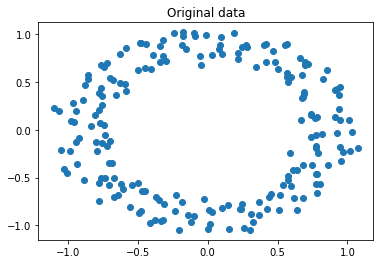

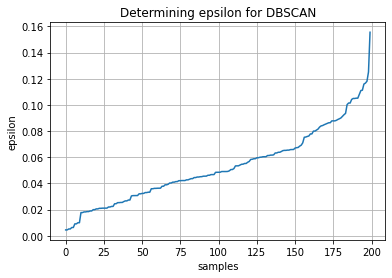

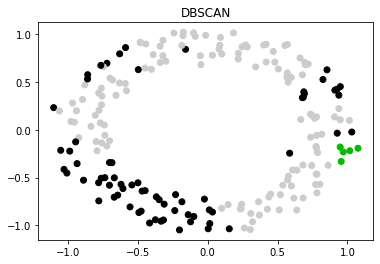

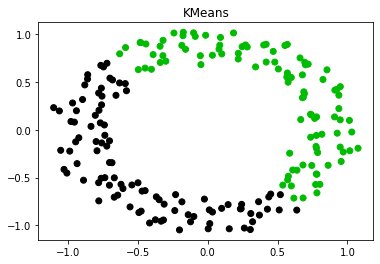

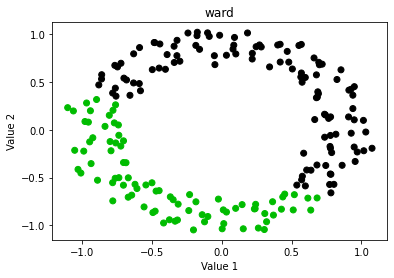

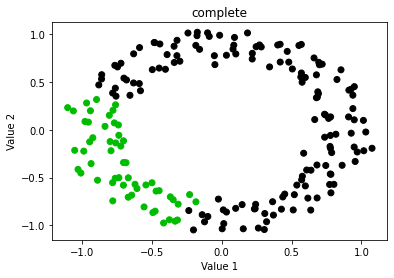

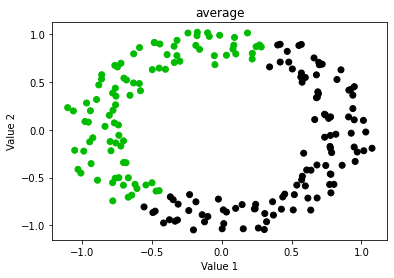

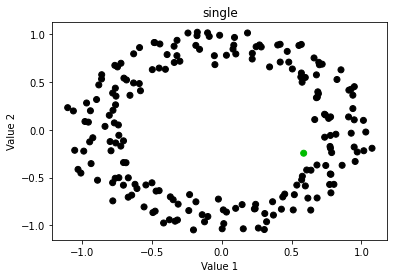

In [6]:
x, y = make_circles(n_samples=200, noise=.05, random_state=0)
plt.scatter(x[:,0],x[:,1])
plt.title("Original data")
plt.show()

min_samples = 5
n_neighbors = 20

neighbors = NearestNeighbors(n_neighbors=n_neighbors)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure()
plt.title('Determining epsilon for DBSCAN')
plt.grid()
plt.ylabel('epsilon')
plt.xlabel('samples')
plt.plot(distances)

plt.figure()
plt.title('DBSCAN')
dbscan = DBSCAN(eps=0.13, min_samples=min_samples, metric='euclidean')
dbmodel_labels = dbscan.fit_predict(x)
colors = cm.nipy_spectral(dbmodel_labels.astype(float) / 2)
plt.scatter(x[:,0], x[:,1], c=colors)
plt.show()


clusterer = KMeans(n_clusters=2, init='random', random_state=10)
cluster_labels = clusterer.fit_predict(x, y)

plt.figure()
colors = cm.nipy_spectral(cluster_labels.astype(float) / 2)
plt.scatter(x[:, 0], x[:, 1], c=colors)
plt.title('KMeans')
plt.show()

linkage_list = ['ward', 'complete', 'average', 'single']
for li in linkage_list:
    clustering_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage=li)
    clustering_labels = clustering_model.fit_predict(x)

    plt.figure()
    colors = cm.nipy_spectral(clustering_labels.astype(float) / 2)
    plt.scatter(x[:, 0], x[:, 1], c=colors)

    plt.title(li)
    plt.xlabel("Value 1")
    plt.ylabel("Value 2")
    plt.show()

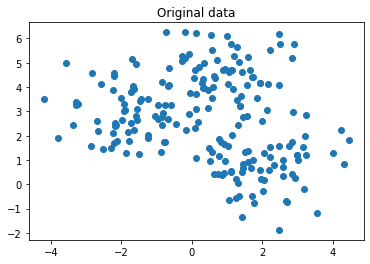

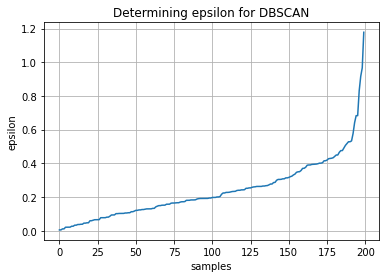

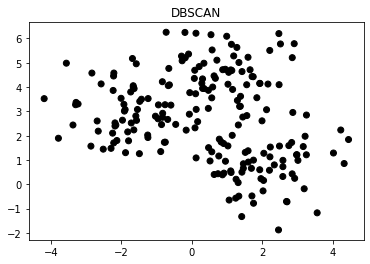

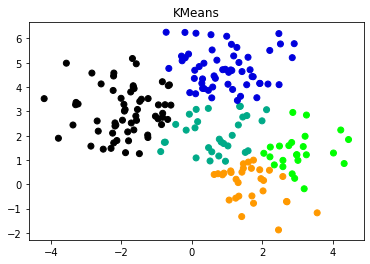

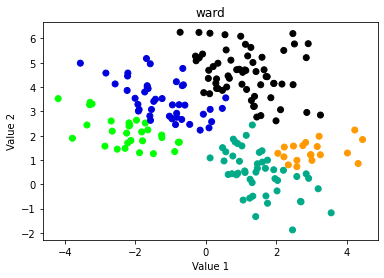

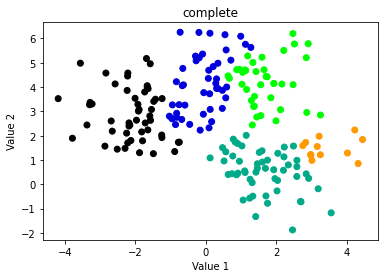

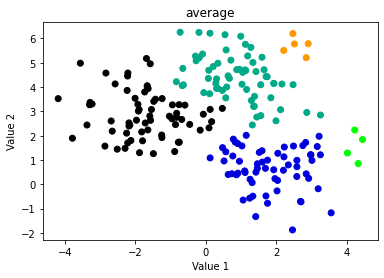

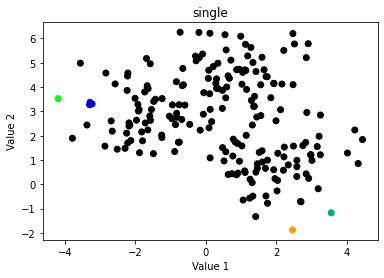

In [7]:
x, y = make_blobs(n_samples=200, random_state=0)
plt.scatter(x[:,0],x[:,1])
plt.title("Original data")
plt.show()

min_samples = 5
n_neighbors = 20

neighbors = NearestNeighbors(n_neighbors=n_neighbors)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure()
plt.title('Determining epsilon for DBSCAN')
plt.grid()
plt.ylabel('epsilon')
plt.xlabel('samples')
plt.plot(distances)

plt.figure()
plt.title('DBSCAN')
dbscan = DBSCAN(eps=0.8, min_samples=min_samples, metric='euclidean')
dbmodel_labels = dbscan.fit_predict(x)
colors = cm.nipy_spectral(dbmodel_labels.astype(float) / n_clusters)
plt.scatter(x[:,0], x[:,1], c=colors)
plt.show()


clusterer = KMeans(n_clusters=n_clusters, init='random', random_state=10)
cluster_labels = clusterer.fit_predict(x, y)

plt.figure()
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
plt.scatter(x[:, 0], x[:, 1], c=colors)
plt.title('KMeans')
plt.show()

linkage_list = ['ward', 'complete', 'average', 'single']
for li in linkage_list:
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=li)
    clustering_labels = clustering_model.fit_predict(x)

    plt.figure()
    colors = cm.nipy_spectral(clustering_labels.astype(float) / n_clusters)
    plt.scatter(x[:, 0], x[:, 1], c=colors)

    plt.title(li)
    plt.xlabel("Value 1")
    plt.ylabel("Value 2")
    plt.show()